In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('listings_prepar.csv', sep=',')
df=df.dropna()
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,766.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,1182.0,0.0,0.0,1.0,0.0,17.0
2,2.0,1.0,354.0,1559.0,1.0,0.0,0.0,0.0,80.0
3,64.0,1.0,301.0,825.0,1.0,0.0,0.0,0.0,115.0
4,136.0,1.0,337.0,822.0,0.0,0.0,1.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...
7665,36.0,2.0,116.0,818.0,1.0,0.0,0.0,0.0,30.0
7666,43.0,1.0,344.0,818.0,0.0,0.0,1.0,0.0,50.0
7667,58.0,2.0,94.0,762.0,0.0,0.0,1.0,0.0,75.0
7668,67.0,1.0,331.0,779.0,1.0,0.0,0.0,0.0,60.0


In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 8].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.tree import DecisionTreeRegressor
sdt = DecisionTreeRegressor(max_leaf_nodes = 10).fit(X_train[:, 0:1], y_train)

In [11]:
y_pred = sdt.predict(X_test[:, 0:1])

In [12]:
sdt.score(X_train[:, 0:1], y_train), sdt.score(X_test[:, 2:3], y_test)

(0.008893212730802569, 0.03204973355618135)

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sdt.predict(X_train[:, 0:1])), mean_squared_error(y_test, y_pred)

(1357.0702146755903, 1309.042766518233)

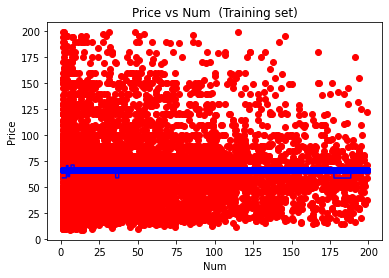

In [15]:
X_grid = np.arange(min(X[:, 0:1]), max(X[:, 0:1]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train[:,0], sdt.predict(X_train[:, 3:4]), 'bo')
plt.title('Price vs Num  (Training set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

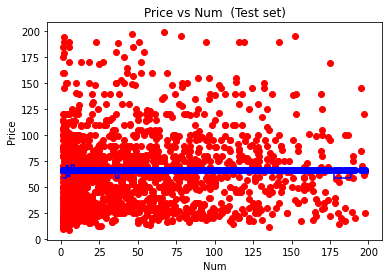

In [16]:
X_grid = np.arange(min(X[:, 0:1]), max(X[:, 0:1]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], sdt.predict(X_test[:, 3:4]), 'bo')
plt.title('Price vs Num  (Test set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

In [17]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train, y_train)

In [18]:
y_pred = dt.predict(X_test)

In [19]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.9962003725770407, -0.8628600885157314)

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, dt.predict(X_train)), mean_squared_error(y_test, y_pred)

(5.202629291612342, 2446.855787338838)

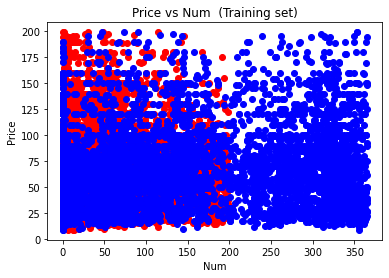

In [21]:
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train[:,2], dt.predict(X_train), 'bo')
plt.title('Price vs Num  (Training set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

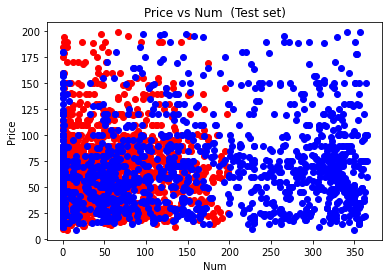

In [22]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,2], dt.predict(X_test), 'bo')
plt.title('Price vs Num  (Test set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0).fit(X_train, y_train)

In [24]:
y_pred = rf.predict(X_test)

In [25]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8172518515760105, -0.0310028658203112)

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, y_pred)

(250.22739446334705, 1354.2162100887442)

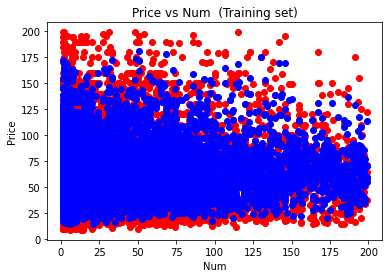

In [27]:
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train[:,0], rf.predict(X_train), 'bo')
plt.title('Price vs Num  (Training set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

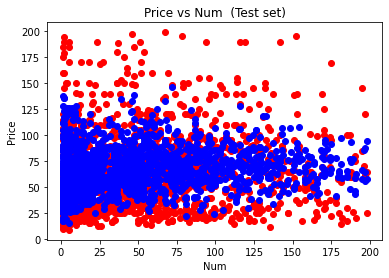

In [28]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], rf.predict(X_test), 'bo')
plt.title('Price vs Num  (Test set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()